In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve


from Metricas.metricas import acuracia,precisao,revocacao, f1, matriz_confusao
from Grid.grid_search import Grid_Search_Tree, Grid_Search_SVM, Grid_Search_RegressaoLogistica



In [2]:
data = pd.read_csv("breast.data", header=None)


In [3]:
data[1] = data[1].map({'M': 1, 'B': 0})
X = data.drop(columns=[1]).values  # Todas as colunas, exceto a segunda
y = data[1].values.reshape(-1, 1)  # A segunda coluna (rótulos)



In [4]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Definir o KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Definir a grade de parâmetros
param_grid_regressaologistica = {
    'a': [0.001, 0.01, 0.1],
    'epocas': [100, 200, 300]
}
melhor_modelo_RL, melhor_params_RL, melhor_media_RL = Grid_Search_RegressaoLogistica(X_treino, y_treino, param_grid_regressaologistica, kf)


In [6]:
# Definir parâmetros para SVM
param_grid_SVM = {
    'C': [2**i for i in range(-25, 26, 2)],
    'gamma': [2**i for i in range(-25, 24, 2)],
    'kernel': ['linear', 'rbf']
}
y_treino_mod=y_treino.ravel()

# Executar a busca personalizada
melhor_modelo_SVM, melhor_params_SVM, melhor_media_SVM = Grid_Search_SVM(X_treino, y_treino_mod, param_grid_SVM, kf)

In [7]:
# Parâmetros para o DecisionTreeClassifier
param_grid_tree = {
        'max_depth': range(1, 21),
        'min_samples_leaf': range(1, 20)
    }

# Executar Grid Search para DecisionTreeClassifier
melhor_modelo_TREE, melhor_params_TREE, melhor_media_TREE = Grid_Search_Tree(X_treino, y_treino_mod, param_grid_tree, kf)


In [8]:
# Normalizar os dados de treinamento
escala = StandardScaler()
X_normalizado_treino = escala.fit_transform(X_treino)

# Normalizar os dados de teste
X_normalizado_teste = escala.transform(X_teste)

melhor_modelo_RL.fit_gd(X_normalizado_treino, y_treino)
previsao_RL = melhor_modelo_RL.predicao(X_normalizado_teste)

melhor_modelo_SVM.fit(X_normalizado_treino, y_treino_mod)
previsao_svm = melhor_modelo_SVM.predict(X_normalizado_teste)

melhor_modelo_TREE.fit(X_normalizado_treino, y_treino_mod)
previsao_tree = melhor_modelo_TREE.predict(X_normalizado_teste)



In [9]:
#Regressão Logistica
acuracia_RL = acuracia(y_teste, previsao_RL)

        
precisao_RL = precisao(y_teste, previsao_RL, classe_positiva=1)

        
revocacao_RL = revocacao(y_teste, previsao_RL, classe_positiva=1)

        
f1_RL = f1(precisao_RL, revocacao_RL)

conf_matrix_RL = matriz_confusao(y_teste.flatten(), previsao_RL, num_classes=2)


In [10]:

print("Acurácia Regressão Logistica: ", acuracia_RL)

print("Precisão Regressão Logistica: ", precisao_RL)

print("Revocação Regressão Logistica: ", revocacao_RL)

print("F1 Regressão Logistica: ", f1_RL)

print("Matriz de Confusão Regressão Logistica:")
for row in conf_matrix_RL:
    print(row)


Acurácia Regressão Logistica:  0.9912280701754386
Precisão Regressão Logistica:  1.0
Revocação Regressão Logistica:  0.9767441860465116
F1 Regressão Logistica:  0.988235294117647
Matriz de Confusão Regressão Logistica:
[71, 0]
[1, 42]


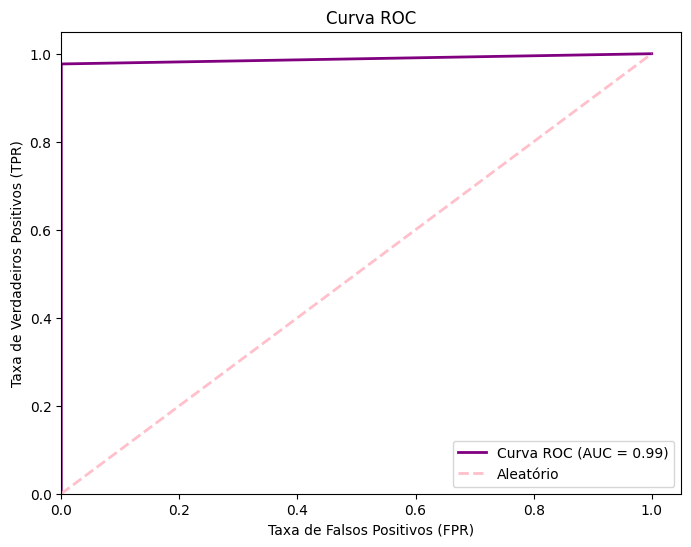

In [11]:
# Calcular as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)
fpr_RL, tpr_RL, thresholds_RL = roc_curve(y_teste, previsao_RL)
# Calcular a área sob a curva ROC (AUC)
roc_auc_RL = auc(fpr_RL, tpr_RL)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_RL, tpr_RL, color='purple', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_RL)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', lw=2, label='Aleatório')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


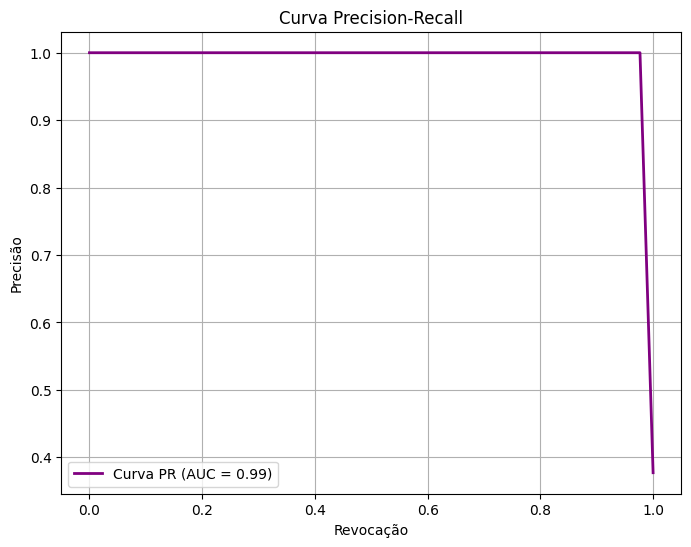

In [12]:


precision_RL, recall_RL, _ = precision_recall_curve(y_teste, previsao_RL)
pr_auc_RL = auc(recall_RL, precision_RL)

plt.figure(figsize=(8, 6))
plt.plot(recall_RL, precision_RL, color='purple', lw=2, label='Curva PR (AUC = %0.2f)' % pr_auc_RL)
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [13]:
acuracia_SVM = acuracia(y_teste, previsao_svm)

        
precisao_SVM = precisao(y_teste, previsao_svm, classe_positiva=1)

        
revocacao_SVM = revocacao(y_teste, previsao_svm, classe_positiva=1)

        
f1_SVM = f1(precisao_SVM, revocacao_SVM)

conf_matrix_SVM = matriz_confusao(y_teste.flatten(), previsao_svm, num_classes=2)

In [14]:

print("Acurácia SVM: ", acuracia_SVM)

print("Precisão SVM: ", precisao_SVM)

print("Revocação SVM: ", revocacao_SVM)

print("F1 SVM: ", f1_SVM)

print("Matriz de Confusão SVM:")
for row in conf_matrix_SVM:
    print(row)


Acurácia SVM:  0.9824561403508771
Precisão SVM:  1.0
Revocação SVM:  0.9534883720930233
F1 SVM:  0.9761904761904763
Matriz de Confusão SVM:
[71, 0]
[2, 41]


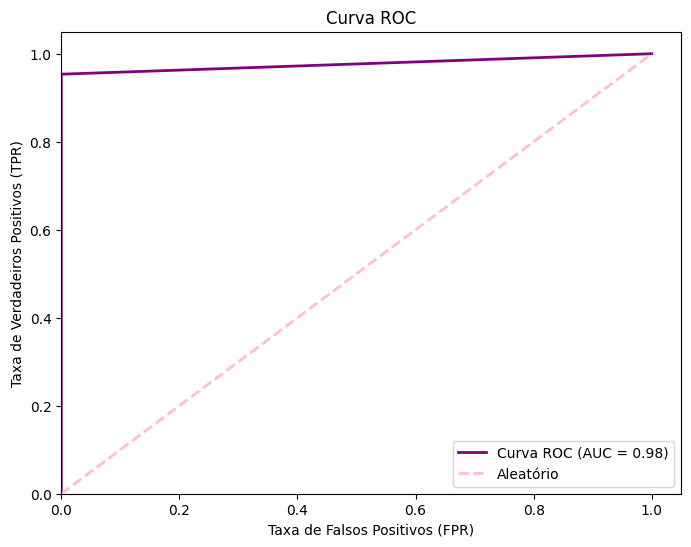

In [15]:
# Calcular as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_teste, previsao_svm)
# Calcular a área sob a curva ROC (AUC)
roc_auc_svm = auc(fpr_svm, tpr_svm)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', lw=2, label='Aleatório')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


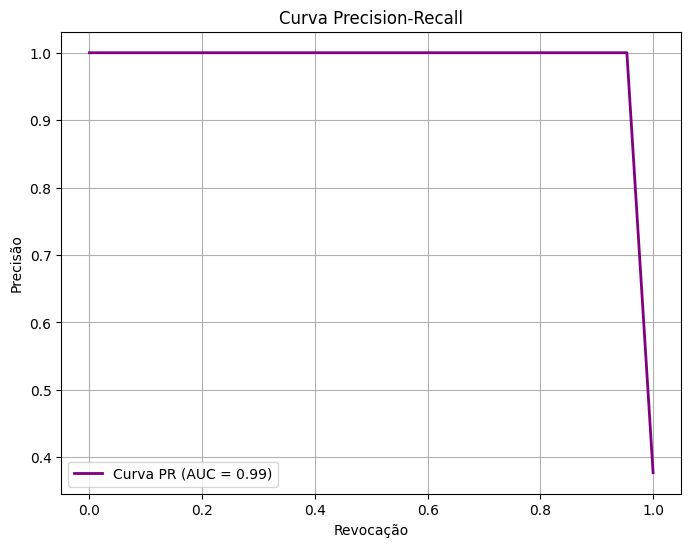

In [16]:


precision_svm, recall_svm, _ = precision_recall_curve(y_teste, previsao_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='purple', lw=2, label='Curva PR (AUC = %0.2f)' % pr_auc_svm)
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [17]:
acuracia_TREE = acuracia(y_teste, previsao_tree)

        
precisao_TREE = precisao(y_teste, previsao_tree, classe_positiva=1)

        
revocacao_TREE = revocacao(y_teste, previsao_tree, classe_positiva=1)

        
f1_TREE = f1(precisao_TREE, revocacao_TREE)

conf_matrix_TREE = matriz_confusao(y_teste.flatten(), previsao_tree, num_classes=2)


In [18]:

print("Acurácia tree: ", acuracia_TREE)

print("Precisão tree: ", precisao_TREE)

print("Revocação tree: ", revocacao_TREE)

print("F1 tree: ", f1_TREE)

print("Matriz de Confusão tree:")
for row in conf_matrix_TREE:
    print(row)


Acurácia tree:  0.9385964912280702
Precisão tree:  0.9285714285714286
Revocação tree:  0.9069767441860465
F1 tree:  0.9176470588235294
Matriz de Confusão tree:
[68, 3]
[4, 39]


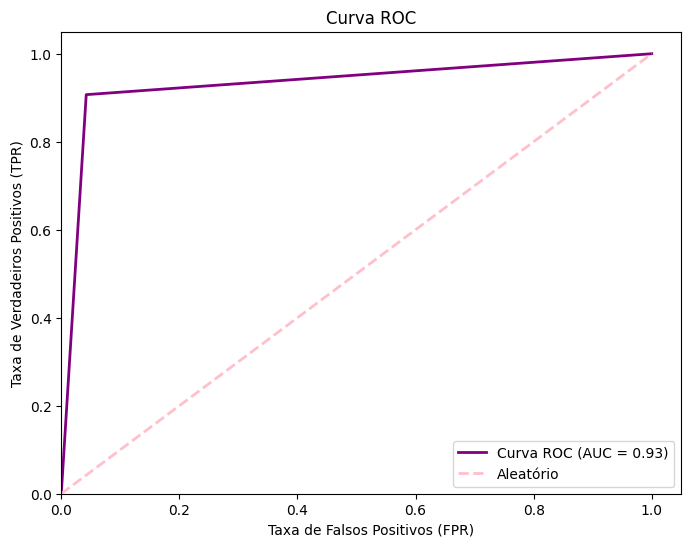

In [19]:
# Calcular as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_teste, previsao_tree)
# Calcular a área sob a curva ROC (AUC)
roc_auc_tree = auc(fpr_tree, tpr_tree)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='purple', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', lw=2, label='Aleatório')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


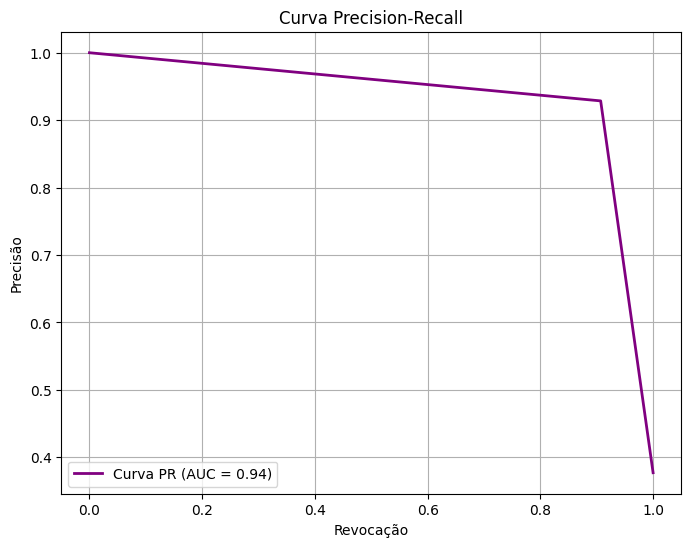

In [20]:
precision_tree, recall_tree, _ = precision_recall_curve(y_teste, previsao_tree)
pr_auc_tree = auc(recall_tree, precision_tree)

plt.figure(figsize=(8, 6))
plt.plot(recall_tree, precision_tree, color='purple', lw=2, label='Curva PR (AUC = %0.2f)' % pr_auc_tree)
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()